

Let's put all of your skills to work on a basic regression modeling notebook! 

[Download the CT Real Estate Transactions data here](https://drive.google.com/file/d/12m6UYYt0Osa3JLLfPZRLlBipRUS9ixGd/view?usp=sharing), drag onto your Google Drive, mount your Drive, then read the dataframe as `df`. Then...



* Q1) Drop any rows where the `AssessedValue` is greater than 1 million USD
* Q2) Drop any rows with missing values
* Q3) Examine the head of the dataframe and check the column types using .info() to ensure that all numeric columns are appropriately converted as such
* Q4) Count how many unique values are in the `Town` column. (hint: there should be 169 towns).
* Q5) Make a new dataframe called `tmp` of dummy variables for each value in the `Town` column. (hint: this dataframe should have 127055 rows and 169 columns, one column for each town).
* Q6) Make a new dataframe called `X` that subsets the `AssessedValue` and `ListYear` from `df`, and concatenate with your dataframe called `tmp`. Hint: This dataframe should have 171 columns.
* Q7) Subset `SaleAmount` from `df` and assign to a variable called `y`.
* Q8) Convert `X` and `y` to numpy arrays. Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.
* Q9) Fit a linear regression model. Calculate mean absolute error for each partition. 
* Q10) Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers.

Please use nice subheaders/titles so that your code is easy to grade.



In [ ]:
# here is a nice way to download as a shareable link - you just need to 'steal' the ID of the file and you can use gdown 
# after you run this, the file will be downloaded to your local runtime and your are ready to rock!
# of course, local files on your runtime are deleted after you close the session, but this is OK. 

# https://drive.google.com/file/d/1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ/view?usp=sharing
!gdown --id 1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ

Downloading...
From: https://drive.google.com/uc?id=1AqU0lrw0DupBcG8poZPWN7UGFFoR4IUJ
To: /content/Real_Estate_Sales_2014-2016.csv
100% 15.4M/15.4M [00:00<00:00, 49.1MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive #mounting the google drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/OPIM 5512 DATA SCI WITH PYTHON/Real_Estate_Sales_2014-2016.csv')
df.head()


,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType
0,1,14046,2014,9/29/2015,Andover,US ROUTE 6 M 33 B 36 L 22,10720,75000.0,0.142933,Vacant Land,NaN
1,2,14011,2014,1/14/2015,Andover,1 JUROVATY LANE,153100,190000.0,0.805789,Residential,Single Family
2,3,15006,2015,11/30/2015,Andover,1 ROSE LANE,102900,50000.0,2.058000,Residential,Single Family
3,4,14044,2014,9/28/2015,Andover,10 PINE RIDGE DR,108700,128368.0,0.846784,Residential,Single Family
4,5,14035,2014,8/10/2015,Andover,101 WALES RD,164000,230000.0,0.713043,Residential,Single Family


# Ans1

In [ ]:
#Q1) Drop any rows where the AssessedValue is greater than 1 million USD


df.drop(df[df['AssessedValue']>1000000].index,inplace=True) #droping the rows where assesedvalue is greater than 1 million usd.

df[df['AssessedValue']>1000000] #checking if we have solved probelm correctly

,ID,SerialNumber,ListYear,DateRecorded,Town,Address,AssessedValue,SaleAmount,SalesRatio,PropertyType,ResidentialType


In [ ]:
df.isnull().sum() #checking the null values

ID                     0
SerialNumber           0
ListYear               0
DateRecorded           5
Town                   0
Address                2
AssessedValue          0
SaleAmount          5022
SalesRatio             0
PropertyType           0
ResidentialType    10002
dtype: int64

#Ans 2


In [ ]:
#  Drop any rows with missing values
df.isnull().sum() #checking missing values
df.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=True)
df.isnull().sum()
df.isnull().sum()

ID                 0
SerialNumber       0
ListYear           0
DateRecorded       0
Town               0
Address            0
AssessedValue      0
SaleAmount         0
SalesRatio         0
PropertyType       0
ResidentialType    0
dtype: int64

# Ans3

In [ ]:
# Examine the head of the dataframe and check the column types using .info() to ensure that all numeric columns are appropriately converted as such

df.info() # we can see that DateRecorded is object type so we have to change it to date time

df['DateRecorded']=pd.to_datetime(df['DateRecorded'])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 127055 entries, 1 to 145941
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               127055 non-null  int64  
 1   SerialNumber     127055 non-null  int64  
 2   ListYear         127055 non-null  int64  
 3   DateRecorded     127055 non-null  object 
 4   Town             127055 non-null  object 
 5   Address          127055 non-null  object 
 6   AssessedValue    127055 non-null  int64  
 7   SaleAmount       127055 non-null  float64
 8   SalesRatio       127055 non-null  float64
 9   PropertyType     127055 non-null  object 
 10  ResidentialType  127055 non-null  object 
dtypes: float64(2), int64(4), object(5)
memory usage: 11.6+ MB


In [ ]:
df.info() # DateRecorded  is changed to datetime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127055 entries, 1 to 145941
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               127055 non-null  int64         
 1   SerialNumber     127055 non-null  int64         
 2   ListYear         127055 non-null  int64         
 3   DateRecorded     127055 non-null  datetime64[ns]
 4   Town             127055 non-null  object        
 5   Address          127055 non-null  object        
 6   AssessedValue    127055 non-null  int64         
 7   SaleAmount       127055 non-null  float64       
 8   SalesRatio       127055 non-null  float64       
 9   PropertyType     127055 non-null  object        
 10  ResidentialType  127055 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(4)
memory usage: 11.6+ MB


# Ans 4

In [ ]:
# how many unique values are in the Town column
df['Town'].nunique() #checked the number of unique values in town column

print("Number of unique values in Town columns are ",df['Town'].nunique())

Number of unique values in Town columns are  169


# Ans 5

In [ ]:
#Q Make a new dataframe called tmp of dummy variables for each value in the Town column. (hint: this dataframe should have 127055 rows and 169 columns, one column for each town).

In [ ]:
temp=pd.get_dummies(df['Town'], prefix=None, prefix_sep='') #made a new dataframe with Town column
print("the shape of temp data frame is ",temp.shape)

the shape of temp data frame is  (127055, 169)


# Ans 6

In [ ]:
#Make a new dataframe called X that subsets the AssessedValue and ListYear from df, and concatenate with your dataframe called tmp. Hint: This dataframe should have 171 columns.

In [ ]:
#bigdata = pd.concat([data1, data2], ignore_index=True, sort=False)

X = pd.DataFrame(df,columns = ['AssessedValue','ListYear'])

X = pd.concat([temp,X],axis=1)

print("The shape of the new data frame which we get from concatenating X and temp is ",X.shape)


The shape of the new data frame which we get from concatenating X and temp is  (127055, 171)


# Ans 7

In [ ]:
#Q7) Subset SaleAmount from df and assign to a variable called y.

y=df['SaleAmount']
y.shape

(127055,)

# Ans 8

In [ ]:
# Convert X and y to numpy arrays. Split your data in X_train, X_test, y_train, y_test using your 7 digit student ID as the random seed and an 80/20 split.

In [ ]:
X=np.array(X) #converted X to numpy array
Y=np.array(y) #converted y to numpy array



In [ ]:
# sklearn functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# split into train and test partitions
X_train, X_test, y_train, y_test = train_test_split(X, Y,
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 2965456)

# Ans 9

In [ ]:
#Q9) Fit a linear regression model. Calculate mean absolute error for each partition.
scaler = MinMaxScaler() # import the scaler
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test) 

In [ ]:
# converting  all to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:

LR = LinearRegression()
# fit the model - one line of code - LR is now a 'model object'
LR = LR.fit(X_train, y_train) # order matters here! don't reverse it!

In [ ]:
# storing the predictions
train_preds = LR.predict(X_train) 
test_preds = LR.predict(X_test)  

In [ ]:
#calculating mean absolute error for each prediction
trainMAE = mean_absolute_error(y_train, train_preds)
print("This is train Mean absolute error:", trainMAE) # train
testMAE = mean_absolute_error(y_test, test_preds)
print("This is test mean absolute error :", testMAE) # test

This is train Mean absolute error: 94343.04871713775
This is test mean absolute error : 88567.94010097189


# Ans 10

In [ ]:
#Q10) Make a scatterplot of actual vs. predicted values for each partition with nice axis labels, titles and markers.

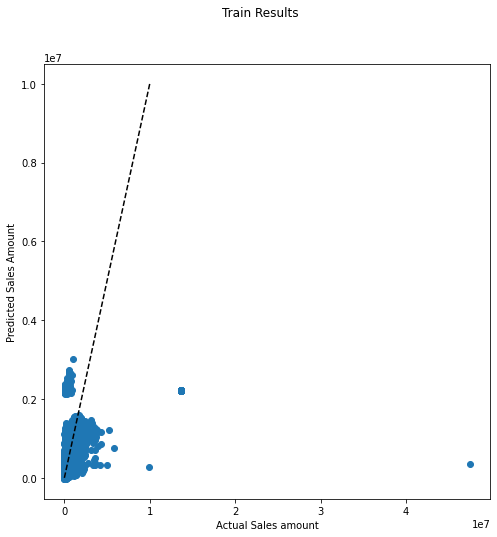

In [ ]:
#ploting a scatter plot for training data
plt.figure(figsize=(8, 8))
plt.scatter(x=y_train, y=train_preds)
plt.plot([0, 10**7], [0, 10**7], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('Actual Sales amount')
plt.ylabel('Predicted Sales Amount')
plt.suptitle('Train Results')
plt.show()

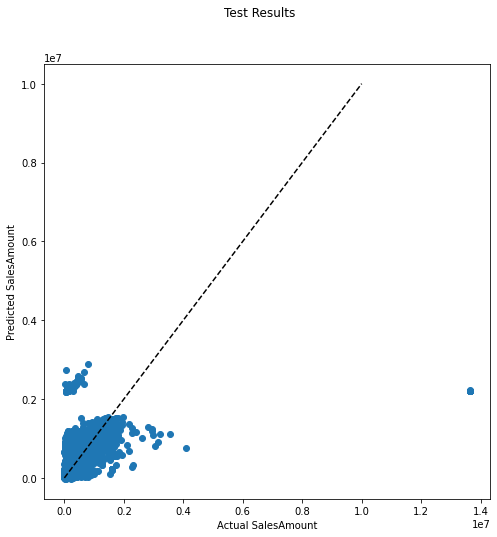

In [ ]:
#plotting the scatter plot for test data
plt.figure(figsize=(8, 8))
plt.scatter(x=y_test, y=test_preds)
plt.plot([0, 10**7], [0, 10**7], '--k') # 45 degree line
plt.axis('tight')
plt.xlabel('Actual SalesAmount')
plt.ylabel('Predicted SalesAmount')
plt.suptitle('Test Results')
plt.show()